#### To be imported libs

In [28]:
from utils.utils import *
from tool.darknet2pytorch import Darknet
import gc 
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [2]:
font = cv2.FONT_HERSHEY_SIMPLEX 

In [108]:
vidcap = cv2.VideoCapture('video/gatos.mp4')
success,image = vidcap.read()
count = 0

images = []
while success:
    #cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file    
    image = cv2.resize(image,(960,540),interpolation=cv2.INTER_AREA)
    images.append(image)
    success,image = vidcap.read()
    #print('Read a new frame: ', success)
    count += 1

In [109]:
gc.collect() 

100

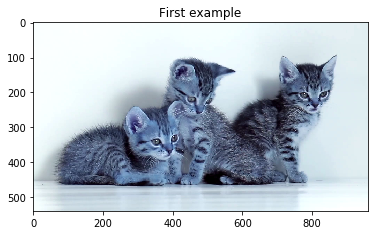

In [110]:
images = np.array(images)
plt.imshow(images[0])
plt.title('First example')
plt.show()

#### Detection

In [111]:
def detect(cfgfile, weightfile, img,verbose=1):
    m = Darknet(cfgfile)

    if verbose: m.print_network()
    m.load_weights(weightfile)
    if verbose: print('Loading weights from %s... Done!' % (weightfile))

    num_classes = 80
    if num_classes == 20:
        namesfile = 'data/voc.names'
    elif num_classes == 80:
        namesfile = 'data/coco.names'
    else:
        namesfile = 'data/names'

    use_cuda = 0
    if use_cuda:
        m.cuda()

    sized = cv2.resize(img,(m.width, m.height),interpolation=cv2.INTER_AREA)

    for i in range(2):
        start = time.time()
        boxes = do_detect(m, sized, 0.5, 0.4, use_cuda)
        finish = time.time()
        if i == 1 and verbose:
            print('Predicted in {} seconds.'.format(finish - start))

    class_names = load_class_names(namesfile)
    boxed_img = box(img, boxes, class_names=class_names)
    return img,boxes,class_names, boxed_img

In [112]:
def box(image, boxes, class_names=None):
    colors = torch.FloatTensor([[1, 0, 1], [0, 0, 1], [0, 1, 1], [0, 1, 0], [1, 1, 0], [1, 0, 0]]);
    img = image.copy()
    
    width = img.shape[0]
    height = img.shape[1]

    for i in range(len(boxes)):
        box = boxes[i]
        x1,y1 = (box[0] - box[2] / 2.0) * width, (box[1] - box[3] / 2.0) * height
        x2,y2  = (box[0] + box[2] / 2.0) * width, (box[1] + box[3] / 2.0) * height
        
        #just swapping because people are stupid
        x1,y1 = y1,x1
        x2,y2 = y2,x2
        
        if len(box) >= 7 and class_names:
            cls_conf = box[5]
            cls_id = box[6]
            img = cv2.putText(img, str(class_names[cls_id]) , (int(x1),int(y1)), font, 1, (0,255,255), 2, cv2.LINE_AA)
        img = cv2.rectangle(img, (int(x2),int(y2)) , (int(x1),int(y1)), (255,0,255), 2) 

    return img


In [103]:
cfgfile = "cfg/yolov4.cfg"
weightfile = "weights/yolov4.weights"

In [23]:
img, boxes, class_names,boxed_img = detect(cfgfile,weightfile,images[0])

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152

Predicted in 3.9283158779144287 seconds.


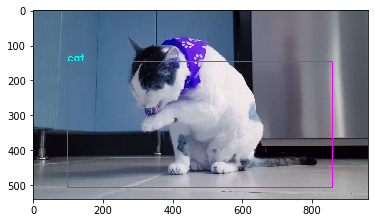

In [24]:
plt.imshow(boxed_img)
plt.show()

In [113]:
boxed_images = []
for image in tqdm(images):
    _, _, _,boxed_img = detect(cfgfile,weightfile,image,0)
    boxed_images.append(boxed_img)




  0%|          | 0/313 [00:00<?, ?it/s]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  0%|          | 1/313 [00:09<47:07,  9.06s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  1%|          | 2/313 [00:18<47:23,  9.14s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  1%|          | 3/313 [00:27<47:40,  9.23s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  1%|▏         | 4/313 [00:36<46:25,  9.01s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  2%|▏         | 5/313 [00:44<45:11,  8.80s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  2%|▏         | 6/313 [00:54<47:02,  9.19s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  2%|▏         | 7/313 [01:04<47:59,  9.41s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  3%|▎         | 8/313 [01:13<46:36,  9.17s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  3%|▎         | 9/313 [01:22<46:44,  9.23s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  3%|▎         | 10/313 [01:31<46:40,  9.24s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  4%|▎         | 11/313 [01:40<45:54,  9.12s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  4%|▍         | 12/313 [01:50<46:42,  9.31s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  4%|▍         | 13/313 [01:59<46:45,  9.35s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  4%|▍         | 14/313 [02:08<45:14,  9.08s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  5%|▍         | 15/313 [02:16<44:05,  8.88s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  5%|▌         | 16/313 [02:25<44:09,  8.92s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  5%|▌         | 17/313 [02:35<44:34,  9.04s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  6%|▌         | 18/313 [02:45<46:19,  9.42s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  6%|▌         | 19/313 [02:55<46:57,  9.58s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  6%|▋         | 20/313 [03:04<46:40,  9.56s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  7%|▋         | 21/313 [03:14<46:49,  9.62s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  7%|▋         | 22/313 [03:24<46:49,  9.66s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  7%|▋         | 23/313 [03:33<46:19,  9.58s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  8%|▊         | 24/313 [03:43<45:54,  9.53s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  8%|▊         | 25/313 [03:54<47:39,  9.93s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  8%|▊         | 26/313 [04:03<46:26,  9.71s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  9%|▊         | 27/313 [04:11<44:29,  9.34s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  9%|▉         | 28/313 [04:20<43:00,  9.05s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





  9%|▉         | 29/313 [04:28<41:58,  8.87s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 10%|▉         | 30/313 [04:37<41:25,  8.78s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 10%|▉         | 31/313 [04:46<41:56,  8.92s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 10%|█         | 32/313 [04:54<41:08,  8.78s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 11%|█         | 33/313 [05:03<41:13,  8.83s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 11%|█         | 34/313 [05:13<41:46,  8.98s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 11%|█         | 35/313 [05:21<40:51,  8.82s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 12%|█▏        | 36/313 [05:30<41:01,  8.89s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 12%|█▏        | 37/313 [05:39<41:21,  8.99s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 12%|█▏        | 38/313 [05:48<41:13,  8.99s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 12%|█▏        | 39/313 [05:57<40:32,  8.88s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 13%|█▎        | 40/313 [06:05<39:51,  8.76s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 13%|█▎        | 41/313 [06:14<39:17,  8.67s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 13%|█▎        | 42/313 [06:22<38:44,  8.58s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 14%|█▎        | 43/313 [06:31<38:24,  8.53s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 14%|█▍        | 44/313 [06:40<39:04,  8.72s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 14%|█▍        | 45/313 [06:49<39:01,  8.74s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 15%|█▍        | 46/313 [06:58<39:28,  8.87s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 15%|█▌        | 47/313 [07:06<38:49,  8.76s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 15%|█▌        | 48/313 [07:16<39:27,  8.93s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 16%|█▌        | 49/313 [07:26<40:32,  9.21s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 16%|█▌        | 50/313 [07:34<39:36,  9.04s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 16%|█▋        | 51/313 [07:43<39:24,  9.03s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 17%|█▋        | 52/313 [07:52<38:31,  8.86s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 17%|█▋        | 53/313 [08:01<38:32,  8.90s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 17%|█▋        | 54/313 [08:10<38:44,  8.98s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 18%|█▊        | 55/313 [08:18<37:50,  8.80s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 18%|█▊        | 56/313 [08:27<37:56,  8.86s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 18%|█▊        | 57/313 [08:36<37:44,  8.84s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 19%|█▊        | 58/313 [08:45<37:29,  8.82s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 19%|█▉        | 59/313 [08:54<37:24,  8.84s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 19%|█▉        | 60/313 [09:02<37:03,  8.79s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 19%|█▉        | 61/313 [09:11<37:08,  8.84s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 20%|█▉        | 62/313 [09:20<36:57,  8.83s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 20%|██        | 63/313 [09:29<37:01,  8.89s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 20%|██        | 64/313 [09:38<36:58,  8.91s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 21%|██        | 65/313 [09:49<39:19,  9.52s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 21%|██        | 66/313 [09:58<38:51,  9.44s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 21%|██▏       | 67/313 [10:07<38:29,  9.39s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 22%|██▏       | 68/313 [10:16<37:36,  9.21s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 22%|██▏       | 69/313 [10:26<37:39,  9.26s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 22%|██▏       | 70/313 [10:34<36:29,  9.01s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 23%|██▎       | 71/313 [10:43<35:50,  8.88s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 23%|██▎       | 72/313 [10:51<35:03,  8.73s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 23%|██▎       | 73/313 [10:59<34:26,  8.61s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 24%|██▎       | 74/313 [11:09<35:15,  8.85s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 24%|██▍       | 75/313 [11:18<35:02,  8.83s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 24%|██▍       | 76/313 [11:26<34:21,  8.70s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 25%|██▍       | 77/313 [11:34<33:55,  8.63s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 25%|██▍       | 78/313 [11:43<33:38,  8.59s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 25%|██▌       | 79/313 [11:52<34:13,  8.78s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 26%|██▌       | 80/313 [12:02<35:00,  9.02s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 26%|██▌       | 81/313 [12:11<34:44,  8.98s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 26%|██▌       | 82/313 [12:20<34:55,  9.07s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 27%|██▋       | 83/313 [12:29<34:27,  8.99s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 27%|██▋       | 84/313 [12:37<33:59,  8.90s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 27%|██▋       | 85/313 [12:46<33:13,  8.74s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 27%|██▋       | 86/313 [12:54<32:42,  8.64s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 28%|██▊       | 87/313 [13:03<32:49,  8.71s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 28%|██▊       | 88/313 [13:13<33:41,  8.99s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 28%|██▊       | 89/313 [13:22<33:29,  8.97s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 29%|██▉       | 90/313 [13:30<32:43,  8.80s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 29%|██▉       | 91/313 [13:39<32:53,  8.89s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 29%|██▉       | 92/313 [13:48<32:34,  8.84s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 30%|██▉       | 93/313 [13:58<33:22,  9.10s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 30%|███       | 94/313 [14:07<33:27,  9.17s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 30%|███       | 95/313 [14:16<33:30,  9.22s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 31%|███       | 96/313 [14:25<33:06,  9.15s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 31%|███       | 97/313 [14:34<32:36,  9.06s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 31%|███▏      | 98/313 [14:43<32:28,  9.06s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 32%|███▏      | 99/313 [14:51<31:31,  8.84s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 32%|███▏      | 100/313 [15:01<32:30,  9.16s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 32%|███▏      | 101/313 [15:10<32:08,  9.10s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 33%|███▎      | 102/313 [15:22<34:41,  9.86s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 33%|███▎      | 103/313 [15:32<34:30,  9.86s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 33%|███▎      | 104/313 [15:41<33:25,  9.60s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 34%|███▎      | 105/313 [15:51<34:01,  9.81s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 34%|███▍      | 106/313 [16:01<33:51,  9.82s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 34%|███▍      | 107/313 [16:09<32:15,  9.40s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 35%|███▍      | 108/313 [16:19<32:00,  9.37s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 35%|███▍      | 109/313 [16:27<31:08,  9.16s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 35%|███▌      | 110/313 [16:36<30:17,  8.95s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 35%|███▌      | 111/313 [16:45<30:24,  9.03s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 36%|███▌      | 112/313 [16:54<30:16,  9.04s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 36%|███▌      | 113/313 [17:04<30:54,  9.27s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 36%|███▋      | 114/313 [17:12<29:54,  9.02s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 37%|███▋      | 115/313 [17:22<30:07,  9.13s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 37%|███▋      | 116/313 [17:30<29:08,  8.88s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 37%|███▋      | 117/313 [17:39<28:44,  8.80s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 38%|███▊      | 118/313 [17:48<29:14,  9.00s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 38%|███▊      | 119/313 [17:57<29:23,  9.09s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 38%|███▊      | 120/313 [18:06<28:31,  8.87s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 39%|███▊      | 121/313 [18:14<27:52,  8.71s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 39%|███▉      | 122/313 [18:23<27:50,  8.75s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 39%|███▉      | 123/313 [18:32<27:51,  8.80s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 40%|███▉      | 124/313 [18:42<28:42,  9.11s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 40%|███▉      | 125/313 [18:51<28:25,  9.07s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 40%|████      | 126/313 [19:00<28:31,  9.15s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 41%|████      | 127/313 [19:09<28:16,  9.12s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 41%|████      | 128/313 [19:18<27:39,  8.97s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 41%|████      | 129/313 [19:26<27:04,  8.83s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 42%|████▏     | 130/313 [19:35<26:36,  8.72s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 42%|████▏     | 131/313 [19:44<26:49,  8.84s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 42%|████▏     | 132/313 [19:52<26:14,  8.70s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 42%|████▏     | 133/313 [20:01<26:32,  8.85s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 43%|████▎     | 134/313 [20:11<26:43,  8.96s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 43%|████▎     | 135/313 [20:19<26:33,  8.95s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 43%|████▎     | 136/313 [20:28<25:52,  8.77s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 44%|████▍     | 137/313 [20:37<25:49,  8.81s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 44%|████▍     | 138/313 [20:45<25:17,  8.67s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 44%|████▍     | 139/313 [20:54<25:38,  8.84s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 45%|████▍     | 140/313 [21:04<26:02,  9.03s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 45%|████▌     | 141/313 [21:13<26:15,  9.16s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 45%|████▌     | 142/313 [21:22<25:28,  8.94s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 46%|████▌     | 143/313 [21:30<24:58,  8.81s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 46%|████▌     | 144/313 [21:39<25:01,  8.89s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 46%|████▋     | 145/313 [21:49<25:34,  9.13s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 47%|████▋     | 146/313 [21:58<25:00,  8.99s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 47%|████▋     | 147/313 [22:06<24:34,  8.88s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 47%|████▋     | 148/313 [22:15<24:33,  8.93s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 48%|████▊     | 149/313 [22:24<23:58,  8.77s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 48%|████▊     | 150/313 [22:32<23:31,  8.66s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 48%|████▊     | 151/313 [22:41<23:20,  8.65s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 49%|████▊     | 152/313 [22:49<23:19,  8.69s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 49%|████▉     | 153/313 [22:59<23:38,  8.87s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 49%|████▉     | 154/313 [23:07<23:05,  8.71s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 50%|████▉     | 155/313 [23:16<23:11,  8.81s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 50%|████▉     | 156/313 [23:25<23:03,  8.81s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 50%|█████     | 157/313 [23:33<22:28,  8.65s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 50%|█████     | 158/313 [23:42<22:36,  8.75s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 51%|█████     | 159/313 [23:51<22:43,  8.85s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 51%|█████     | 160/313 [24:00<22:13,  8.71s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 51%|█████▏    | 161/313 [24:08<22:04,  8.71s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 52%|█████▏    | 162/313 [24:17<21:49,  8.67s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 52%|█████▏    | 163/313 [24:26<22:08,  8.86s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 52%|█████▏    | 164/313 [24:35<22:15,  8.97s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 53%|█████▎    | 165/313 [24:45<22:09,  8.98s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 53%|█████▎    | 166/313 [24:53<21:43,  8.87s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 53%|█████▎    | 167/313 [25:01<21:13,  8.72s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 54%|█████▎    | 168/313 [25:11<21:17,  8.81s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 54%|█████▍    | 169/313 [25:19<21:02,  8.76s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 54%|█████▍    | 170/313 [25:28<20:48,  8.73s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 55%|█████▍    | 171/313 [25:36<20:28,  8.65s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 55%|█████▍    | 172/313 [25:45<20:05,  8.55s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 55%|█████▌    | 173/313 [25:53<19:56,  8.55s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 56%|█████▌    | 174/313 [26:01<19:40,  8.49s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 56%|█████▌    | 175/313 [26:10<19:27,  8.46s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 56%|█████▌    | 176/313 [26:18<19:19,  8.46s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 57%|█████▋    | 177/313 [26:27<19:25,  8.57s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 57%|█████▋    | 178/313 [26:36<19:12,  8.54s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 57%|█████▋    | 179/313 [26:45<19:19,  8.66s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 58%|█████▊    | 180/313 [26:53<19:08,  8.64s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 58%|█████▊    | 181/313 [27:01<18:48,  8.55s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 58%|█████▊    | 182/313 [27:11<19:03,  8.73s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 58%|█████▊    | 183/313 [27:21<19:43,  9.10s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 59%|█████▉    | 184/313 [27:29<19:18,  8.98s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 59%|█████▉    | 185/313 [27:38<19:12,  9.01s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 59%|█████▉    | 186/313 [27:47<18:58,  8.96s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 60%|█████▉    | 187/313 [27:56<18:36,  8.86s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 60%|██████    | 188/313 [28:05<18:31,  8.89s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 60%|██████    | 189/313 [28:14<18:23,  8.90s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 61%|██████    | 190/313 [28:22<17:58,  8.76s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 61%|██████    | 191/313 [28:31<17:55,  8.82s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 61%|██████▏   | 192/313 [28:40<17:44,  8.80s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 62%|██████▏   | 193/313 [28:49<17:53,  8.95s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 62%|██████▏   | 194/313 [28:58<17:29,  8.82s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 62%|██████▏   | 195/313 [29:07<17:35,  8.94s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 63%|██████▎   | 196/313 [29:16<17:41,  9.07s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 63%|██████▎   | 197/313 [29:25<17:24,  9.00s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 63%|██████▎   | 198/313 [29:34<17:02,  8.89s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 64%|██████▎   | 199/313 [29:42<16:40,  8.77s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 64%|██████▍   | 200/313 [29:52<16:50,  8.94s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 64%|██████▍   | 201/313 [30:00<16:33,  8.87s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 65%|██████▍   | 202/313 [30:09<16:15,  8.79s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 65%|██████▍   | 203/313 [30:19<16:36,  9.06s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 65%|██████▌   | 204/313 [30:28<16:30,  9.09s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 65%|██████▌   | 205/313 [30:36<16:05,  8.94s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 66%|██████▌   | 206/313 [30:45<15:38,  8.77s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 66%|██████▌   | 207/313 [30:53<15:24,  8.72s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 66%|██████▋   | 208/313 [31:03<15:35,  8.91s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 67%|██████▋   | 209/313 [31:11<15:15,  8.80s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 67%|██████▋   | 210/313 [31:21<15:23,  8.97s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 67%|██████▋   | 211/313 [31:30<15:26,  9.08s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 68%|██████▊   | 212/313 [31:39<15:11,  9.02s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 68%|██████▊   | 213/313 [31:48<15:16,  9.16s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 68%|██████▊   | 214/313 [31:57<15:02,  9.12s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 69%|██████▊   | 215/313 [32:06<14:42,  9.00s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 69%|██████▉   | 216/313 [32:15<14:38,  9.06s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 69%|██████▉   | 217/313 [32:24<14:09,  8.85s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 70%|██████▉   | 218/313 [32:32<13:57,  8.82s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 70%|██████▉   | 219/313 [32:41<13:54,  8.88s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 70%|███████   | 220/313 [32:51<14:00,  9.04s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 71%|███████   | 221/313 [33:01<14:23,  9.38s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 71%|███████   | 222/313 [33:09<13:46,  9.08s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 71%|███████   | 223/313 [33:18<13:17,  8.86s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 72%|███████▏  | 224/313 [33:26<12:56,  8.73s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 72%|███████▏  | 225/313 [33:35<12:45,  8.70s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 72%|███████▏  | 226/313 [33:44<12:47,  8.82s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 73%|███████▎  | 227/313 [33:54<13:09,  9.18s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 73%|███████▎  | 228/313 [34:03<12:53,  9.10s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 73%|███████▎  | 229/313 [34:12<12:36,  9.00s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 73%|███████▎  | 230/313 [34:20<12:19,  8.91s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 74%|███████▍  | 231/313 [34:30<12:19,  9.02s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 74%|███████▍  | 232/313 [34:38<12:02,  8.92s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 74%|███████▍  | 233/313 [34:47<11:51,  8.90s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 75%|███████▍  | 234/313 [34:56<11:43,  8.90s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 75%|███████▌  | 235/313 [35:05<11:38,  8.95s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 75%|███████▌  | 236/313 [35:13<11:16,  8.79s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 76%|███████▌  | 237/313 [35:22<10:58,  8.67s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 76%|███████▌  | 238/313 [35:31<10:55,  8.74s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 76%|███████▋  | 239/313 [35:40<10:48,  8.76s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 77%|███████▋  | 240/313 [35:48<10:36,  8.72s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 77%|███████▋  | 241/313 [35:57<10:31,  8.76s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 77%|███████▋  | 242/313 [36:05<10:14,  8.66s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 78%|███████▊  | 243/313 [36:14<09:59,  8.56s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 78%|███████▊  | 244/313 [36:23<10:01,  8.72s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 78%|███████▊  | 245/313 [36:31<09:45,  8.61s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 79%|███████▊  | 246/313 [36:40<09:40,  8.67s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 79%|███████▉  | 247/313 [36:49<09:36,  8.74s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 79%|███████▉  | 248/313 [36:58<09:30,  8.77s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 80%|███████▉  | 249/313 [37:06<09:13,  8.65s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 80%|███████▉  | 250/313 [37:17<09:52,  9.41s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 80%|████████  | 251/313 [37:27<09:42,  9.39s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 81%|████████  | 252/313 [37:35<09:15,  9.10s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 81%|████████  | 253/313 [37:44<08:58,  8.98s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 81%|████████  | 254/313 [37:52<08:42,  8.85s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 81%|████████▏ | 255/313 [38:01<08:32,  8.83s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 82%|████████▏ | 256/313 [38:10<08:25,  8.87s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 82%|████████▏ | 257/313 [38:19<08:12,  8.79s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 82%|████████▏ | 258/313 [38:27<07:57,  8.68s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 83%|████████▎ | 259/313 [38:36<07:50,  8.71s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 83%|████████▎ | 260/313 [38:45<07:39,  8.68s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 83%|████████▎ | 261/313 [38:53<07:26,  8.59s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 84%|████████▎ | 262/313 [39:01<07:15,  8.55s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 84%|████████▍ | 263/313 [39:10<07:07,  8.55s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 84%|████████▍ | 264/313 [39:19<07:03,  8.64s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 85%|████████▍ | 265/313 [39:28<07:05,  8.86s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 85%|████████▍ | 266/313 [39:37<06:52,  8.77s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 85%|████████▌ | 267/313 [39:45<06:42,  8.75s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 86%|████████▌ | 268/313 [39:54<06:36,  8.80s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 86%|████████▌ | 269/313 [40:04<06:37,  9.05s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 86%|████████▋ | 270/313 [40:12<06:20,  8.84s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 87%|████████▋ | 271/313 [40:21<06:08,  8.77s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 87%|████████▋ | 272/313 [40:30<06:01,  8.81s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 87%|████████▋ | 273/313 [40:39<05:53,  8.84s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 88%|████████▊ | 274/313 [40:47<05:39,  8.70s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 88%|████████▊ | 275/313 [40:56<05:38,  8.90s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 88%|████████▊ | 276/313 [41:06<05:36,  9.10s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 88%|████████▊ | 277/313 [41:15<05:21,  8.93s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 89%|████████▉ | 278/313 [41:24<05:15,  9.01s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 89%|████████▉ | 279/313 [41:34<05:14,  9.25s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 89%|████████▉ | 280/313 [41:43<05:07,  9.31s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 90%|████████▉ | 281/313 [41:53<05:07,  9.61s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 90%|█████████ | 282/313 [42:02<04:50,  9.36s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 90%|█████████ | 283/313 [42:11<04:34,  9.16s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 91%|█████████ | 284/313 [42:20<04:22,  9.03s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 91%|█████████ | 285/313 [42:28<04:07,  8.83s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 91%|█████████▏| 286/313 [42:38<04:04,  9.06s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 92%|█████████▏| 287/313 [42:47<03:56,  9.09s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 92%|█████████▏| 288/313 [42:55<03:42,  8.92s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 92%|█████████▏| 289/313 [43:04<03:33,  8.90s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 93%|█████████▎| 290/313 [43:13<03:23,  8.83s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 93%|█████████▎| 291/313 [43:21<03:12,  8.76s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 93%|█████████▎| 292/313 [43:30<03:02,  8.69s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 94%|█████████▎| 293/313 [43:40<03:01,  9.09s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 94%|█████████▍| 294/313 [43:48<02:49,  8.94s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 94%|█████████▍| 295/313 [43:58<02:41,  8.97s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 95%|█████████▍| 296/313 [44:06<02:29,  8.79s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 95%|█████████▍| 297/313 [44:14<02:19,  8.70s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 95%|█████████▌| 298/313 [44:24<02:12,  8.85s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 96%|█████████▌| 299/313 [44:32<02:02,  8.74s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 96%|█████████▌| 300/313 [44:41<01:52,  8.67s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 96%|█████████▌| 301/313 [44:49<01:43,  8.59s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 96%|█████████▋| 302/313 [44:58<01:35,  8.72s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 97%|█████████▋| 303/313 [45:07<01:28,  8.81s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 97%|█████████▋| 304/313 [45:16<01:19,  8.84s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 97%|█████████▋| 305/313 [45:24<01:09,  8.71s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 98%|█████████▊| 306/313 [45:34<01:02,  8.95s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 98%|█████████▊| 307/313 [45:43<00:53,  8.97s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 98%|█████████▊| 308/313 [45:53<00:46,  9.33s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 99%|█████████▊| 309/313 [46:02<00:36,  9.22s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 99%|█████████▉| 310/313 [46:10<00:26,  9.00s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





 99%|█████████▉| 311/313 [46:20<00:18,  9.02s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





100%|█████████▉| 312/313 [46:28<00:08,  9.00s/it]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear





100%|██████████| 313/313 [46:37<00:00,  8.94s/it]


In [105]:
def convert_frames_to_video(frame_array,pathOut,fps):
    #frame_array already ordered
    #for sorting the file names properly

    height, width, layers = frame_array[0].shape
    size = (width,height)
    
    try:
        out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    except:
        print('no video written')

    for i in range(len(frame_array)):
        
        # writing to a image array
        out.write(frame_array[i])
    out.release()

In [114]:
width,height = img.shape[0], img.shape[1]
convert_frames_to_video(boxed_images,"prediction3.mp4",20)

In [107]:
from IPython.display import Video

Video("prediction2.mp4")